<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/mlp_classification__make_classification_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

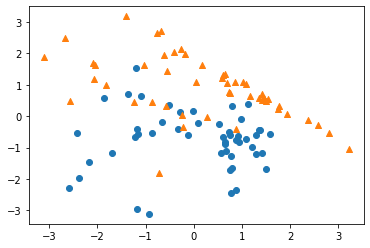

In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # Multi Layer Perceptron Classifier 

# create artifical dataset
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=3) # 'make_classification ' generates a classification dataset
                        # 'n_features=2' makes two features, 'n_informative=2' makes both relevant to the target, 'n_redundant=0' makes neither just combinations of the informative features
                        # default 100 samples, 2 target class memberships/labels
                        # assign generated samples (feature matrix) to X, corresponding class memberships/labels (target array) to y

# plot artificial dataset 
plt.scatter(X[y==0][:,0], X[y==0][:,1]) # each sample X has two columns (features)
                                        # '[y==0]' creates T/F mask based on target array. 
                                        # apply mask to each column [:,0] and [:,1], selects only samples where target is 0
                                        # assign first column to x-axis, second column to y-axis                                        
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='^') # same as above but with [y==1] mask, selecting only samples where target is 1
                                                      # 'marker='^' makes the markers triangles 
plt.show()

In [4]:
## neural network classification

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# instantiate neural network
mlp = MLPClassifier(max_iter=1500, random_state=7) # default 'max_iter' is 200, not enough iterations for neural network to converge on optimal coefficients, change to 1500
                                   # 'random_state' hold for coefficient (weights and biases) initialization 
                                   # default one hidden layer with 100 neurons, 'relu' activation
                                   # 2 nuerons in input layer because dataset has two features, 1 neuron in output layer because binary classification
                                   # because binary classification, defaults output layer 'logistic' activation 
                                   # therefore neural network shape is: 
                                   #                                    input layer  ->  hidden layer  ->  output layer
                                   #                                    2 neurons        100 neurons       1 neuron
                                   #                                                     relu activation   logistic activation

# fit neural network
mlp.fit(X_train, y_train)

# evaluate neural network
print("neural network accuracy:", mlp.score(X_test, y_test))
print()


neural network accuracy: 0.8



In [5]:
## tuning neural network
mlp = MLPClassifier(max_iter=1500, hidden_layer_sizes=(200,50), activation='tanh', alpha=0.00001, random_state=7) # match previous random state so neural networks can be compared
                                                                               # 'hidden_layer_sizes=' set two hidden layers, first with 200 neurons, second with 50 neurons
                                                                               #  'activation=' set activation function as 'tanh'
                                                                               # 'alpha=' set iteration step size: how much the neural network changes the coefficients at each iteration while converging on optimal coefficients
                                                                               # ...if the value is too small, may never converge on the optimal solution. If the value is too large, may miss the optimal solution 
                                                                               # ...default value is 0.0001 (decreasing alpha often requires an increase in 'max_iter='
                                                                               # now neural network shape is: 
                                                                               #                                    input layer  ->  hidden layer  ->  hidden layer  ->  output layer
                                                                               #                                    2 neurons        200 neurons       50 neurons        1 neuron
                                                                               #                                                     tanh activation   tanh activation   logistic activation
mlp.fit(X_train, y_train)
print("tuned neural network accuracy:", mlp.score(X_test, y_test))

# code and comments by github.com/alandavidgrunberg


tuned neural network accuracy: 0.88
